In [1]:
!pip install pandas
!pip install matplotlib
!pip install numpy
import matplotlib.pyplot as plt
import numpy as np

# Import pandas after installation
import pandas as pd
print(pd.__version__)

2.2.2


In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

In [4]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


##Find out the number of rows and columns

In [7]:
print("Number of rows in the dataset:", len(df))
print("Number of columns in the dataset:", len(df.columns))

Number of rows in the dataset: 65437
Number of columns in the dataset: 114


##Identify the data types of each column

In [9]:
print("Data type of each column:")
print(df.dtypes)

Data type of each column:
ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object


In [11]:
##unique countries 
df['Country'].nunique()

185

##DATA WRANGLING

In [13]:
##Identify and Analyze Duplicates
duplicate_rows_count = df.duplicated().sum()
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows_count}")
print("\nFirst few duplicate rows:")
print(duplicate_rows.head())

Number of duplicate rows: 0

First few duplicate rows:
Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWith, OfficeStackAsyncAdm

In [15]:
duplicate_rows = df[df.duplicated(subset=['MainBranch', 'Employment','RemoteWork'])]
print(duplicate_rows)
duplicate_column_frequencies = duplicate_rows[['MainBranch', 'Employment', 'RemoteWork']].apply(pd.Series.value_counts)

print("\nFrequency of Identical Values in Duplicate Rows:")
print(duplicate_column_frequencies)

       ResponseId                      MainBranch                 Age  \
1               2  I am a developer by profession     35-44 years old   
2               3  I am a developer by profession     45-54 years old   
14             15  I am a developer by profession     25-34 years old   
15             16  I am a developer by profession     45-54 years old   
16             17     I code primarily as a hobby  Under 18 years old   
...           ...                             ...                 ...   
65432       65433  I am a developer by profession     18-24 years old   
65433       65434  I am a developer by profession     25-34 years old   
65434       65435  I am a developer by profession     25-34 years old   
65435       65436  I am a developer by profession     18-24 years old   
65436       65437     I code primarily as a hobby     18-24 years old   

                Employment                            RemoteWork   Check  \
1      Employed, full-time                     

##removing duplicate rows

In [17]:
df_no_duplicates = df.drop_duplicates()
num_duplicate_rows_after_removal = df_no_duplicates.duplicated().sum()
print(f"Number of duplicate rows after removal: {num_duplicate_rows_after_removal}")

Number of duplicate rows after removal: 0


##Handling missing values

In [19]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
sorted_missing_values = missing_values.sort_values(ascending=False)
print(sorted_missing_values)

AINextMuch less integrated    64289
AINextLess integrated         63082
AINextNo change               52939
AINextMuch more integrated    51999
EmbeddedAdmired               48704
                              ...  
YearsCode                      5568
NEWSOSites                     5151
LearnCode                      4949
EdLevel                        4653
AISelect                       4530
Length: 109, dtype: int64


##handling missing values
##removing missing values  for specific attributes like "LanguageHaveWorkedWith, LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,
ToolsTechAdmired".

In [23]:
#traget columns
columns_to_clean = [
    "LanguageHaveWorkedWith", "LanguageWantToWorkWith", "LanguageAdmired",
    "DatabaseHaveWorkedWith", "DatabaseWantToWorkWith", "DatabaseAdmired",
    "ToolsTechHaveWorkedWith", "ToolsTechWantToWorkWith", "ToolsTechAdmired"
]
for col in columns_to_clean:
    if col in df.columns:
        most_frequent_value = df[col].mode()[0]  # Get the most common value
        df[col].fillna(most_frequent_value, inplace=True)

df[columns_to_clean].isnull().sum()

LanguageHaveWorkedWith     0
LanguageWantToWorkWith     0
LanguageAdmired            0
DatabaseHaveWorkedWith     0
DatabaseWantToWorkWith     0
DatabaseAdmired            0
ToolsTechHaveWorkedWith    0
ToolsTechWantToWorkWith    0
ToolsTechAdmired           0
dtype: int64

In [27]:
import numpy as np
import pandas as pd
df['YearsCode'] = df['YearsCode'].replace('More than 50 years', 51)
df['YearsCode'] = pd.to_numeric(df['YearsCode'], errors='coerce')
mean_yearscode = df['YearsCode'].mean()
df['YearsCode'].fillna(mean_yearscode, inplace=True)
print(df['YearsCode'].isnull().sum())

0


C:\Users\sthok\AppData\Local\Temp\ipykernel_16824\2811076060.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YearsCode'].fillna(mean_yearscode, inplace=True)


In [31]:
critical_columns = ['Employment', 'JobSat','RemoteWork']
missing_values = df[critical_columns].isnull().sum()
print("Missing values in above columns are:")
print(missing_values)
mostfrequentvalue = df['JobSat'].mode()[0] 
df['JobSat'].fillna(mostfrequentvalue, inplace=True)
mostfrequentvalue1 = df['RemoteWork'].mode()[0]
df['RemoteWork'].fillna(mostfrequentvalue1,inplace=True)
                                                     

Missing values in above columns are:
Employment    0
JobSat        0
RemoteWork    0
dtype: int64


C:\Users\sthok\AppData\Local\Temp\ipykernel_16824\1227586771.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['JobSat'].fillna(mostfrequentvalue, inplace=True)


In [33]:
##Normalize ConvertedCompYearly using Min-Max Scaling.
from sklearn.preprocessing import MinMaxScaler
# Fill missing values with the median of the column
df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].median(), inplace=True)
scaler = MinMaxScaler()
df['ConvertedCompYearly'] = scaler.fit_transform(df[['ConvertedCompYearly']])
print(df[['ConvertedCompYearly']].head())

   ConvertedCompYearly
0             0.003998
1             0.003998
2             0.003998
3             0.003998
4             0.003998


C:\Users\sthok\AppData\Local\Temp\ipykernel_16824\3230101945.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].median(), inplace=True)


In [35]:
##Apply Z-score Normalization to ConvertedCompYearly
from scipy.stats import zscore
df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].median(), inplace=True)
df['ConvertedCompYearly_Zscore'] = zscore(df['ConvertedCompYearly'], nan_policy='omit')
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_Zscore']].head())

   ConvertedCompYearly  ConvertedCompYearly_Zscore
0             0.003998                   -0.067514
1             0.003998                   -0.067514
2             0.003998                   -0.067514
3             0.003998                   -0.067514
4             0.003998                   -0.067514


C:\Users\sthok\AppData\Local\Temp\ipykernel_16824\3617822573.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].median(), inplace=True)


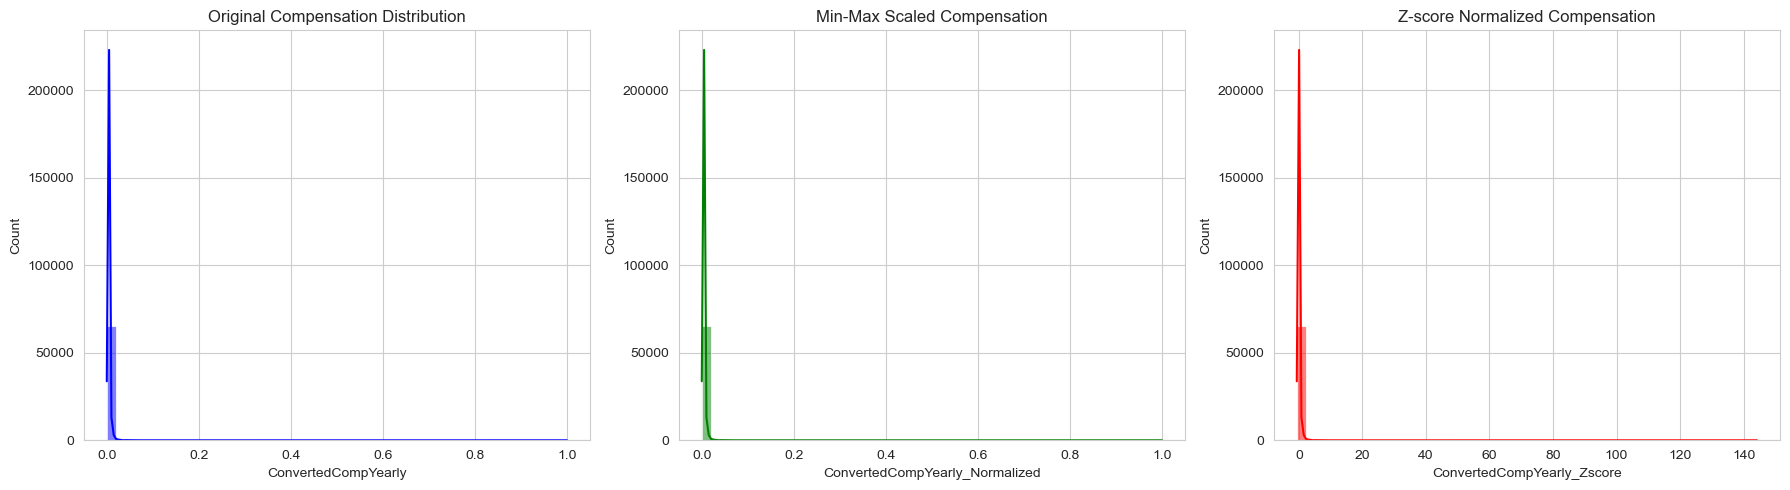

In [37]:
##Visualization of Normalized Data
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original Distribution
sns.histplot(df['ConvertedCompYearly'].dropna(), bins=50, kde=True, ax=axes[0], color='blue')
axes[0].set_title("Original Compensation Distribution")
axes[0].set_xlabel("ConvertedCompYearly")

# Min-Max Scaled Distribution
sns.histplot(df['ConvertedCompYearly'], bins=50, kde=True, ax=axes[1], color='green')
axes[1].set_title("Min-Max Scaled Compensation")
axes[1].set_xlabel("ConvertedCompYearly_Normalized")

# Z-score Normalized Distribution
sns.histplot(df['ConvertedCompYearly_Zscore'].dropna(), bins=50, kde=True, ax=axes[2], color='red')
axes[2].set_title("Z-score Normalized Compensation")
axes[2].set_xlabel("ConvertedCompYearly_Zscore")

# Show the plots
plt.tight_layout()
plt.show()

In [39]:
##Encoding Categorical Variables
import pandas as pd
df_encoded = pd.get_dummies(df, columns=['Employment'], prefix='Employment')
print(df_encoded.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

                             RemoteWork   Check  \
0                                Remote  Apples   
1                                Remote  Apples   
2                                Remote  Apples   
3  Hybrid (some remote, some in-person)  Apples   
4  Hybrid (some remote, some in-person)  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN  

C:\Users\sthok\AppData\Local\Temp\ipykernel_16824\2707835912.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  experience_job_sat = df.groupby('Experience_Range')['JobSat'].median()


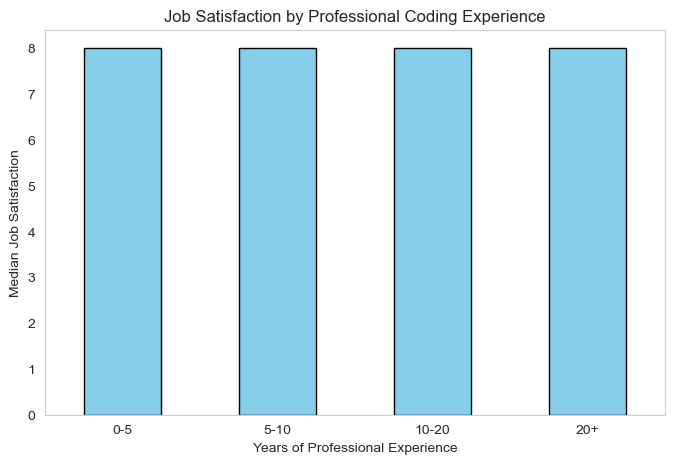

In [41]:
##Analysis of Experience and Job Satisfaction
import pandas as pd
import matplotlib.pyplot as plt
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5', '5-10', '10-20', '20+']
df['Experience_Range'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels)
experience_job_sat = df.groupby('Experience_Range')['JobSat'].median()
plt.figure(figsize=(8, 5))
experience_job_sat.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Job Satisfaction by Professional Coding Experience')
plt.xlabel('Years of Professional Experience')
plt.ylabel('Median Job Satisfaction')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(False)
plt.show()

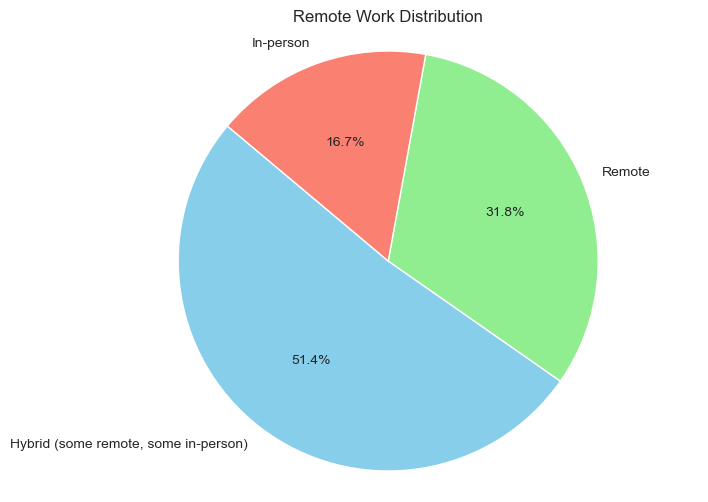

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each category in RemoteWork column
remote_work_counts = df['RemoteWork'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(remote_work_counts, labels=remote_work_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon'], startangle=140)
plt.title("Remote Work Distribution")
plt.axis("equal")  # Ensures the pie chart is circular

# Show the plot
plt.show()

C:\Users\sthok\AppData\Local\Temp\ipykernel_16824\3180485509.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='JobSat', y='ConvertedCompYearly', data=df, palette="coolwarm")
C:\Users\sthok\AppData\Local\Temp\ipykernel_16824\3180485509.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='JobSat', y='YearsCodePro', data=df, palette="coolwarm")


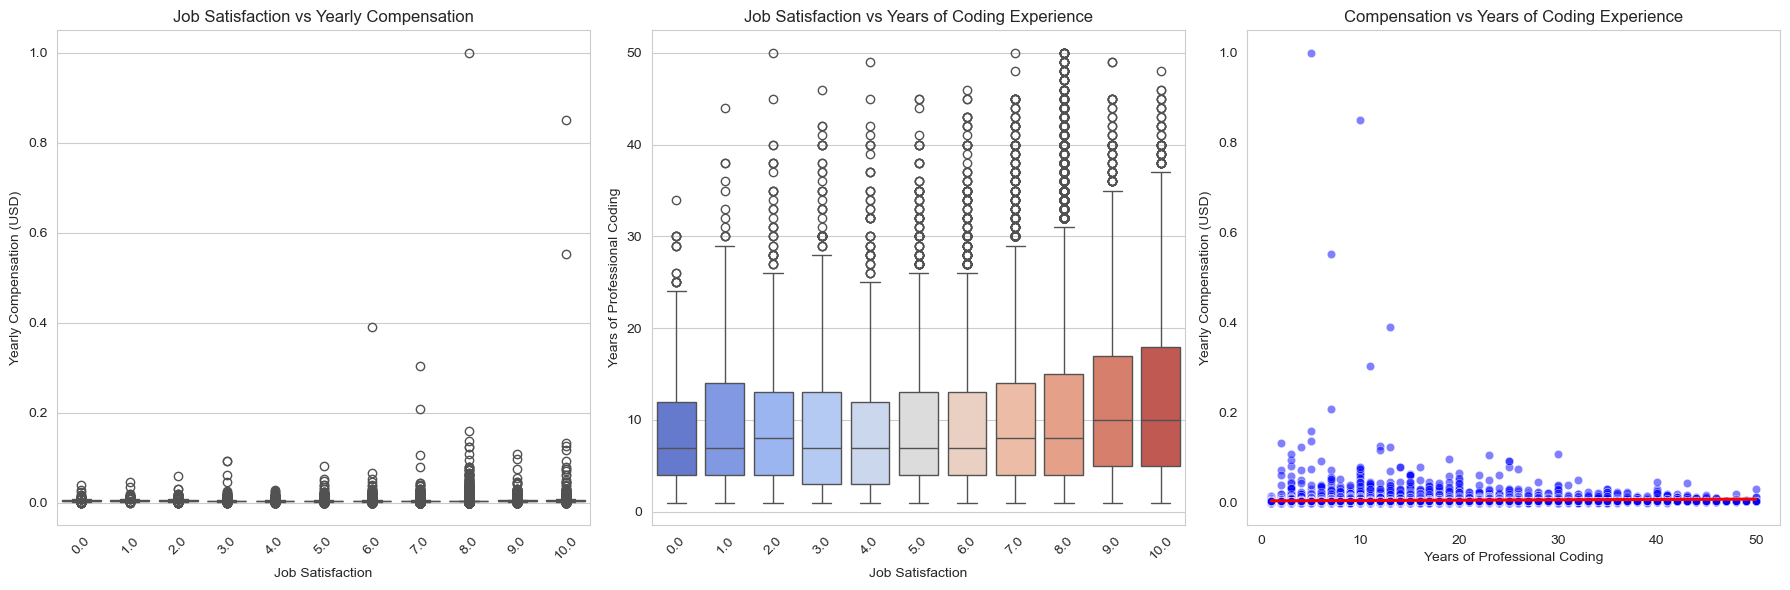

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop missing values for relevant columns
df = df[['JobSat', 'ConvertedCompYearly', 'YearsCodePro']].dropna()

# Convert YearsCodePro to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Filter extreme compensation values for better visualization (Optional)
df = df[df['ConvertedCompYearly'] < 500000]  # Exclude extreme outliers

# Set visualization style
sns.set_style("whitegrid")
plt.figure(figsize=(18, 6))

# --- 1. Box Plot: Job Satisfaction vs Compensation ---
plt.subplot(1, 3, 1)
sns.boxplot(x='JobSat', y='ConvertedCompYearly', data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Job Satisfaction vs Yearly Compensation")
plt.ylabel("Yearly Compensation (USD)")
plt.xlabel("Job Satisfaction")

# --- 2. Box Plot: Job Satisfaction vs Years of Experience ---
plt.subplot(1, 3, 2)
sns.boxplot(x='JobSat', y='YearsCodePro', data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Job Satisfaction vs Years of Coding Experience")
plt.ylabel("Years of Professional Coding")
plt.xlabel("Job Satisfaction")

# --- 3. Scatter Plot: Compensation vs Years of Experience ---
plt.subplot(1, 3, 3)
sns.scatterplot(x='YearsCodePro', y='ConvertedCompYearly', data=df, alpha=0.5, color="blue")
sns.regplot(x='YearsCodePro', y='ConvertedCompYearly', data=df, scatter=False, color="red")
plt.title("Compensation vs Years of Coding Experience")
plt.xlabel("Years of Professional Coding")
plt.ylabel("Yearly Compensation (USD)")

# Show plot
plt.tight_layout()
plt.grid(False)
plt.show()

Which database technologies are currently most sought after?

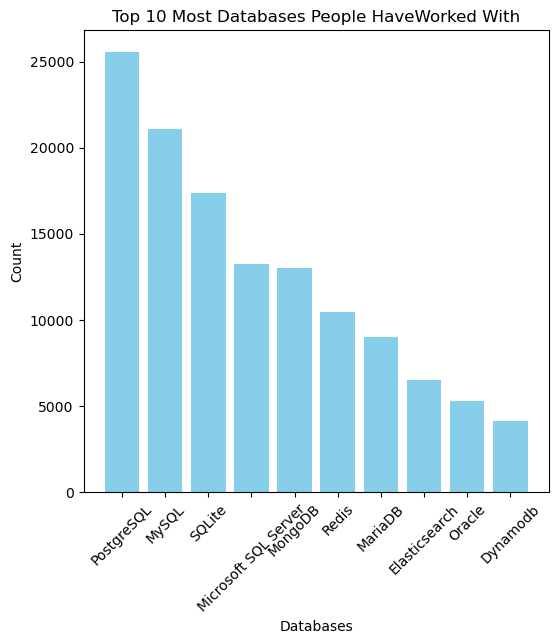

In [23]:
##Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Splitting multiple database choices and counting occurrences
database_counts = df['DatabaseHaveWorkedWith'].dropna().str.split(';').explode().value_counts()

# Selecting the top 5 most desired databases
top_10_databases = database_counts.head(10)

# Plotting the histogram
plt.figure(figsize=(6, 6))
plt.bar(top_10_databases.index, top_10_databases.values, color='skyblue')
plt.xlabel('Databases')
plt.ylabel('Count')
plt.title('Top 10 Most Databases People HaveWorked With')
plt.xticks(rotation=45)
plt.show()

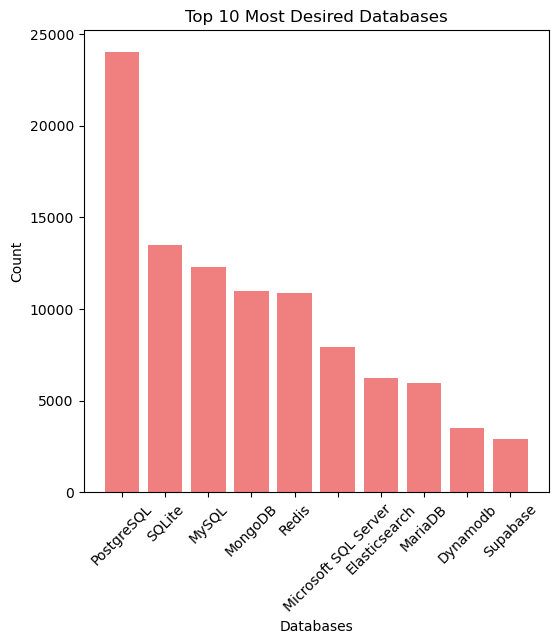

In [25]:
##Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Splitting multiple database choices and counting occurrences
database_counts = df['DatabaseWantToWorkWith'].dropna().str.split(';').explode().value_counts()

# Selecting the top 5 most desired databases
top_10_databases = database_counts.head(10)

# Plotting the histogram
plt.figure(figsize=(6, 6))
plt.bar(top_10_databases.index, top_10_databases.values, color='lightcoral')
plt.xlabel('Databases')
plt.ylabel('Count')
plt.title('Top 10 Most Desired Databases')
plt.xticks(rotation=45)
plt.show()

Which programming languages are most in demand?

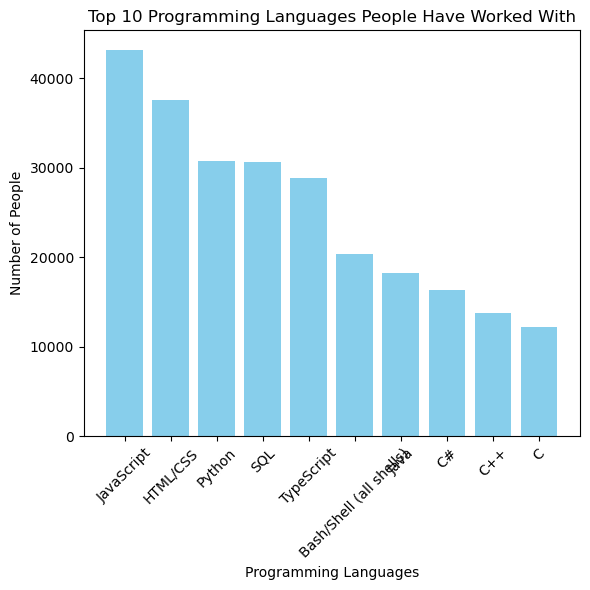

In [19]:
## top 10 programming languages for the current year
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Splitting the 'LanguageHaveWorkedWith' column into individual languages and counting occurrences
language_counts = df['LanguageHaveWorkedWith'].dropna().str.split(';').explode().value_counts()

# Select the top 10 programming languages
top_10_languages = language_counts.head(10)

# Plotting the bar chart
plt.figure(figsize=(6, 6))
plt.bar(top_10_languages.index, top_10_languages.values, color='skyblue')
plt.xlabel('Programming Languages')
plt.ylabel('Number of People')
plt.title('Top 10 Programming Languages People Have Worked With')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

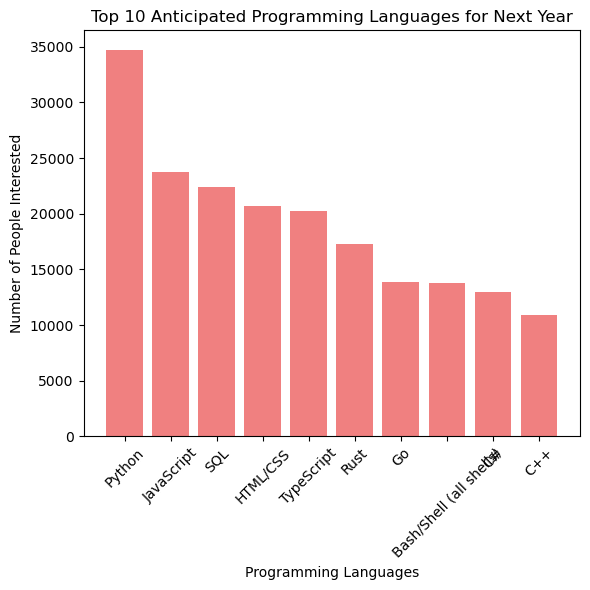

In [21]:
##anticipated programming language trends for the next year.
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Splitting the 'LanguageWantToWorkWith' column into individual languages and counting occurrences
language_trends = df['LanguageWantToWorkWith'].dropna().str.split(';').explode().value_counts()

# Select the top 10 most desired programming languages for the next year
top_10_trends = language_trends.head(10)

# Plotting the bar chart for anticipated programming language trends
plt.figure(figsize=(6, 6))
plt.bar(top_10_trends.index, top_10_trends.values, color='lightcoral')
plt.xlabel('Programming Languages')
plt.ylabel('Number of People Interested')
plt.title('Top 10 Anticipated Programming Languages for Next Year')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()